In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


* The goal of dimensionality reduction
    + preserve semantics of high-dimensional data in low-dimensional subspace
    + overcome the curse of dimensionality: "When the dimensionality increases, the volume of the space increases so fast that the available data become sparse"


* Any ideas?
* Idea 1: semantics is maintained by the spread: find directions that maximize the variance of data (PCA)
    * Explaining variances

    * Why can we remove correlations using PCA?
    * How can we reduce dimensions using PCA?
    

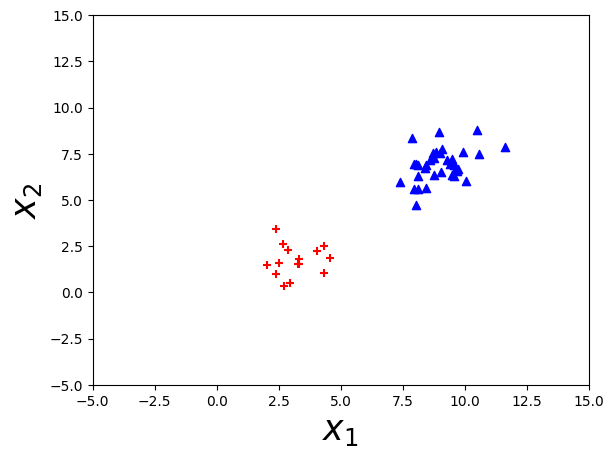

In [74]:

# generate random normally distributed point clouds (customize as needed)
x1 = np.random.normal(loc=3.0, size=15)
y1 = np.random.normal(loc=2.0, size=15)
x2 = np.random.normal(loc=9.0, size=35)
y2 = np.random.normal(loc=7.0, size=35)

# now do the plotting with matplotlib
plt.scatter(x1,y1,color='red', marker='+',s=35)
plt.scatter(x2,y2,color='blue', marker= '^',s=35)
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.savefig('example.png', bbox_inches='tight')
plt.show()

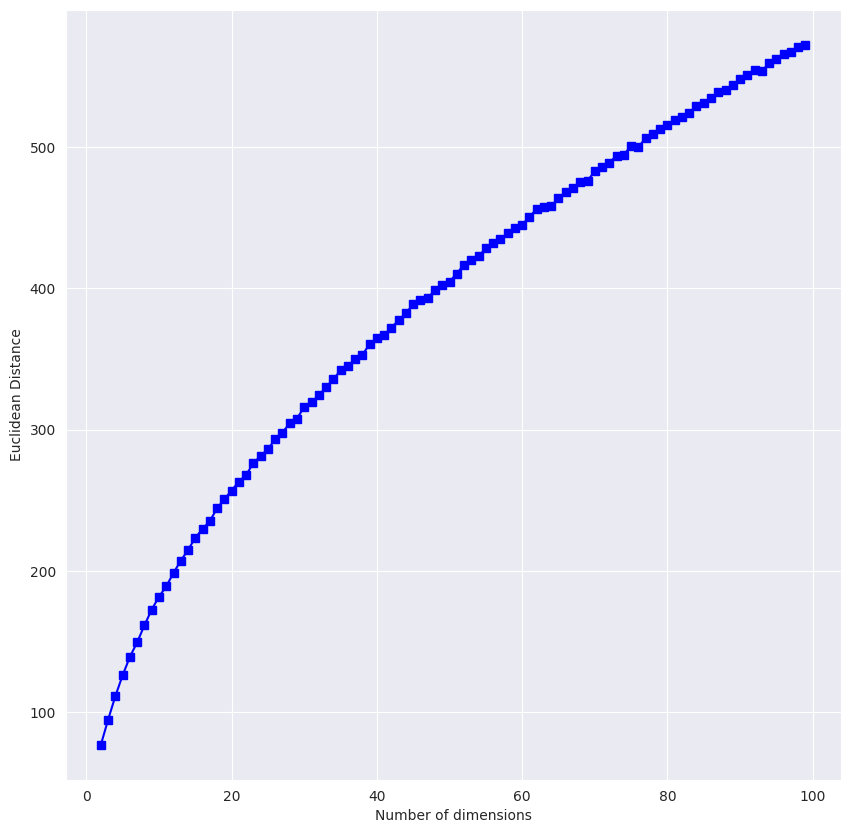

In [121]:
 def euclidean_distance(p1, p2):
    p1, p2 = np.array(p1), np.array(p2) #Ensure p1/p2 are NumPy Arrays
    return np.sqrt(np.sum(np.square(p2-p1)))
%matplotlib inline
sns.set_style('darkgrid')
avg_distances = []

# a n-dimensional space
for n in range(2, 100):
    # origin
    origin = [0 for i in range(n)]
    # randomly sample 500 data points and calculate their distance to the origin
    samples = [ np.random.randint(low=-100, high=100, size=n) for _ in range(500)]
    avg_distances.append(np.mean([euclidean_distance(data, origin) for data in samples]))
plt.figure(figsize=(10,10))
plt.plot(range(2,100), avg_distances,'bs-')
# plt.plot( np.diff(avg_distances),'ro-')
plt.xlabel('Number of dimensions')
plt.ylabel('Euclidean Distance')
plt.show()

In [2]:

X = pd.read_csv('data/remove-correlation.csv', delimiter=",", header=None).to_numpy()
# plt.plot(X[:,0], X[:,1], '.', markersize=14)
# plt.axis('equal')
# plt.title('Original Data')
# plt.show()
X.shape


(50, 2)

## Covariance Matrix
* $S=$

In [3]:
# variance using method
print(X[:, 0] .var())

# variance manually
# print(np.mean(X[:, 0]*X[:, 0])- np.mean(X[:, 0])*np.mean(X[:, 0]))

1.348543475904


In [118]:
# covariance
from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(X)
cov.covariance_

array([[1.34854348, 0.86535425],
       [0.86535425, 1.02642386]])

In [97]:
# covariance between two variables: E[x_0 * x_1] - E[x_0, x_1]
# x_0 = X[:, 0] 
# x_1 = X[:, 1]
# s_01 = np.mean(x_0*x_1) - x_0.mean() * x_1.mean()
# print(s_01)

0.865354251616008


In [98]:
# covariance matrix: E[X^T X] - E[X] (E[X])*T
# covmat = np.dot(X.T, X)/len(X) -  np.dot(X.mean(axis=0, keepdims=True).T , X.mean(axis=0, keepdims=True))
# print(covmat)

[[1.34854348 0.86535425]
 [0.86535425 1.02642386]]


In [4]:
# Make all the steps easy: compute the covariance matrix for normalised X: E[X^T X]
# Now we only need E[X^T X]
mu = X.mean(axis=0) # shape: (2,)
sigma = X.std(axis=0)  # shape: (2,) 
Xnorm = (X - mu)/sigma # data shape: (50, 2)
covmat = np.dot(Xnorm.T, Xnorm)/len(Xnorm) 
print(covmat)


[[1.        0.7355261]
 [0.7355261 1.       ]]


## PCA
We can do Eigen-decomposition on $S$, where $S$ is a symmetric matrix
* $S=PDP^T$ 
* $ S p = \lambda p$
* all the eigenvalues of $S$ are nonnegative $$ $S$ is positive semi-difinite, 

In [26]:
def eigenvector_decomposition(covmat):
    lambd, eigenvector= np.linalg.eig(covmat)
    print('covariance matrix: {}'.format(covmat))
    print('Eigen values: {}'.format(lambd))
    print('Eigen vectors: {}'.format(eigenvector))
    return lambd, eigenvector
# manually compoutate covariance matrix
mu = X.mean(axis=0) # shape: (2,)
sigma = X.std(axis=0)  # shape: (2,) 
Xnorm = (X - mu)/sigma # data shape: (50, 2)
covmat = np.dot(Xnorm.T, Xnorm)/len(Xnorm) 
_, _ = eigenvector_decomposition(covmat)




covariance matrix: [[1.        0.7355261]
 [0.7355261 1.       ]]
Eigen values: [1.7355261 0.2644739]
Eigen vectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [32]:
# comvariant matrix from sklearn PCA
pca = PCA(n_components=2, random_state=2)
pca.fit(Xnorm)
covmat = pca.get_covariance()
lambd, eigenvector = eigenvector_decomposition(covmat)

# verify the result: covmat*eigenvector = lambd*eigenvector
print('Verify the result: covmat*eigenvector = lambd*eigenvector')
print(np.dot(covmat, eigenvector))
print(lambd*eigenvector)

covariance matrix: [[1.02040816 0.75053683]
 [0.75053683 1.02040816]]
Eigen values: [1.770945   0.26987133]
Eigen vectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Verify the result: covmat*eigenvector = lambd*eigenvector
[[ 1.25224722 -0.19082785]
 [ 1.25224722  0.19082785]]
[[ 1.25224722 -0.19082785]
 [ 1.25224722  0.19082785]]


In [33]:
# eigenvalues and eigenvectors from sklearn PCA
covmat = pca.get_covariance()
lambd = pca.explained_variance_ 
eigenvector = pca.components_
print('covariance matrix: {}'.format(covmat))
print('Eigen values: {}'.format(lambd))
print('Eigen vectors: {}'.format(eigenvector)) # (n_components, n_features)

# verify the result: covmat*eigenvector = lambd*eigenvector
print('Verify the result: covmat*eigenvector = lambd*eigenvector')
print(np.dot(covmat, eigenvector))
print(lambd*eigenvector)

covariance matrix: [[1.02040816 0.75053683]
 [0.75053683 1.02040816]]
Eigen values: [1.770945   0.26987133]
Eigen vectors: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Verify the result: covmat*eigenvector = lambd*eigenvector
[[-1.25224722 -0.19082785]
 [-1.25224722  0.19082785]]
[[-1.25224722 -0.19082785]
 [-1.25224722  0.19082785]]



**How does it work?**

Let's understand eigenvalues and eigenvectors
* $ A v = \lambda v$,  where $v \in \mathbb{R}^{d}$
$$
\left[\begin{array}{cccc}
A_{11} & A_{12} & \cdots & A_{1 d} \\
A_{21} & A_{22} & \cdots & A_{2 d} \\
\vdots & \vdots & \ddots & \vdots \\
A_{d 1} & A_{d 2} & \cdots & A_{d d}
\end{array}\right]\left[\begin{array}{c}
v_1 \\
v_2 \\
\vdots \\
v_d
\end{array}\right]
$$


In [101]:
# let's understand  covmat . S P=P D
print(np.dot(covmat, eigenvector[:, 0])) # (d, d) * (d, 1)

print(eigenvector[:, 0]*lambd[0]) # (d, 1)

[1.22720227 1.22720227]
[1.22720227 1.22720227]


* $AV=VD$
* Importantly, if A is a symmetric matrix, $v_1, ..., v_d$ are orthogonal to each other. **V is an orthogonal matrix**
* D is a diagonal matrix
* $A=VDV^T$ 



In [102]:
# check whether eigenvector is orthogonal
np.dot(eigenvector[:, 0], eigenvector[:, 1])

0.0

## Remove correlation via PCA
* Project data into new coordinates
    * eigenvalues/eigenvectors are not actually ordered typically but in this case they are and the first eigenvalue accounts for the most variance. By that standard it is superior.
* Why does the transformation of eigenvector remove the correlation?
    + "ovariance among each pair of the principal axes is zero (the principal axes are uncorrelated i.e. they are orthogonal to each other)." (copy from 4.7)

In [120]:
# Z=X^T P
Z = np.dot(Xnorm, eigenvector) # (n, D) * (D, d) D = d
eigenvector.shape
# Z # (D, D)

# check covariance
X = Xnorm
print("The orginal covariance/unnormalized correlations:")
print(np.dot(X.T, X)/len(X) -  np.dot(X.mean(axis=0, keepdims=True).T , X.mean(axis=0, keepdims=True)))

print("The covariance/unnormalized correlations after removing correlation:")
X = Z
print(np.dot(X.T, X)/len(X) -  np.dot(X.mean(axis=0, keepdims=True).T , X.mean(axis=0, keepdims=True)))

The orginal covariance/unnormalized correlations:
[[1.        0.7355261]
 [0.7355261 1.       ]]
The covariance/unnormalized correlations after removing correlation:
[[1.73552610e+00 2.87461239e-16]
 [2.87461239e-16 2.64473903e-01]]


## Back to the idea of dimensionality reduction
* Could we use distance metrics we learnt from last week?
        $$
        \mathcal{L}=\sum_{i<j}\left(d_{i j}-\left\|\mathbf{y}_i-\mathbf{y}_j\right\|\right)^2
        $$
        + How many computations we need?
        + Projection-based method
* t-SNE: $p_{i j}=\frac{w_{i j}}{Z}$ is the normalized similarity between points i and j. 
    + Two closed neighbours in the high-dimensional space -> large $p_{i j}$. Clearly, it gives high price for putting closd neighbours far away. 
    + How about the price to put points far away closed? 
    + How to define $q_{i j}$? 
    + How close neighbours attract each other while all points repulse each other? How to optimize?
            $$\min \mathcal{L}=\sum_{i, j} p_{i j} \log \frac{p_{i j}}{q_{i j}} = \sum_{i j} p_{i j} \log p_{i j}-\sum_{i j} p_{i j} \log q_{i j}$$ 
            $$\min -\sum_{i, j} p_{i j} \log w_{i j}+\log \sum_{i, j} w_{i j}$$
$w_{i j}$=sim($x_i^d, x_j^d$)-> normalized similarity $q_{i , j}$
            <!-- ![image.png](attachment:image.png) -->
    + Some materials for different tastes: [High-level visualization](https://www.enjoyalgorithms.com/blog/tsne-algorithm-in-ml); [another high-level visualization](https://www.youtube.com/watch?v=NEaUSP4YerM&t=215s); [Concrete explanation and background in math](https://www.youtube.com/watch?v=MnRskV3NY1k&t=1896s)
    + Why do we need t-SNE instead of PCA? See [the image](https://www.astroml.org/_images/fig_S_manifold_PCA_1.png) for an intuitive unserstanding.
    

## Variance vs Coefficient Correlation

In [28]:
f1 = np.array([1,2,3,4,5])
f2 = np.array([1,2.5,3,4.9,4.9])
x = np.stack((f1, f2),) # (num_feat, num_data)
print((np.corrcoef(x, rowvar=True)))


[[1.         0.96674865]
 [0.96674865 1.        ]]


In [27]:
c = np.cov(x, rowvar=True, dtype=None)
print(c)
d = np.diag(c)
print(d)
stddev = np.sqrt(d.real)
print(stddev)
corr = c/stddev[:, None]
corr = corr/stddev[None, :]
print(corr)

[[2.5   2.55 ]
 [2.55  2.783]]
[2.5   2.783]
[1.58113883 1.6682326 ]
[[1.         0.96674865]
 [0.96674865 1.        ]]


## Pass Activity

(442, 3)


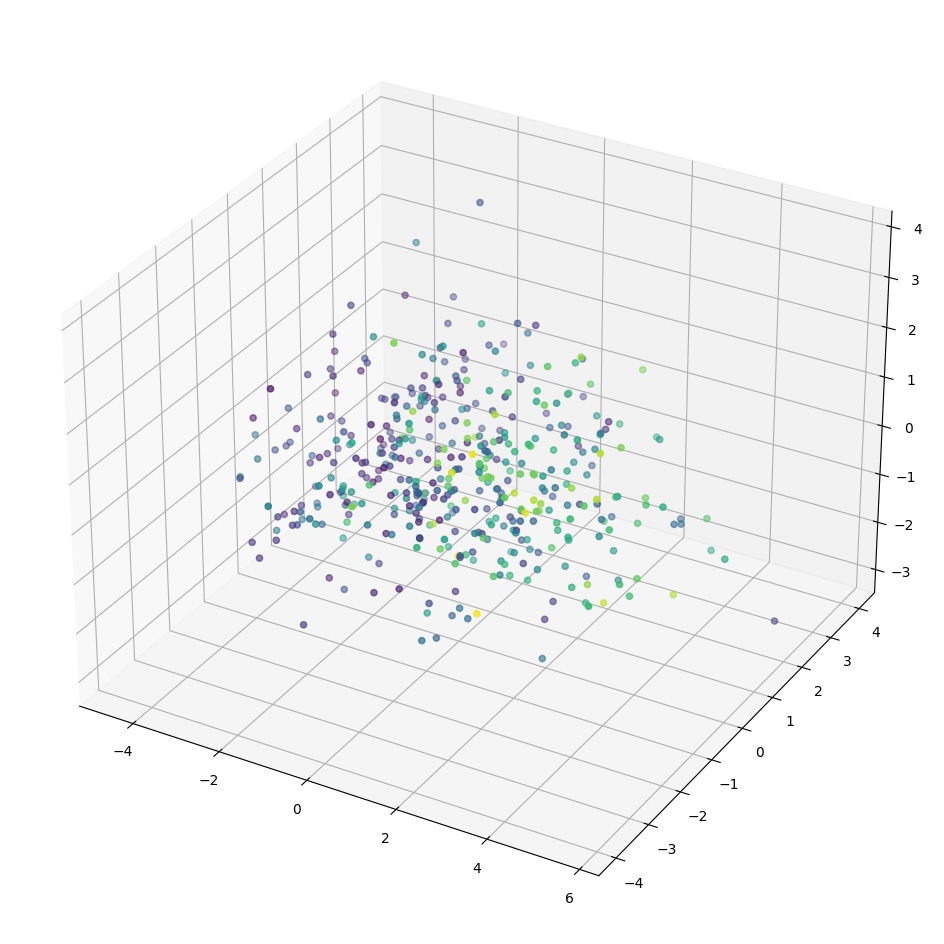

In [15]:
# 1. Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data. 

df = load_diabetes(as_frame=True)
df_data = df['data']

def perform_PCA(data_norm, n_components=3):
    # perform PCA using sklearn PCA implementation
    pca = PCA(n_components=n_components, random_state=2)
    pca.fit(data_norm)
    reduced_X = pca.transform(data_norm)
    print(reduced_X.shape)
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(reduced_X[:, 0], reduced_X[:, 1], reduced_X[:, 2],c=df.target)
    plt.show()
    return pca, reduced_X


# normalize our data via formula
data_copy = df_data.copy().values
data_norm = (data_copy-data_copy.mean(axis=0)) / data_copy.std(axis=0)
pca, reduced_X = perform_PCA(data_norm)

# normalize our data via sklearn API
# data_copy = df_data.copy()
# scaler = StandardScaler()
# data_norm = scaler.fit_transform(data_copy)
# perform_PCA(data_norm)

In [126]:
# 2. What is the variance (%) covered by first 3 components?  How is this percentage of variance computed? 
var= pca.explained_variance_ratio_
print(var)
print(var.sum())

# Measure the reconstruction error
# n_comp = range(1, 10)
# rec_error = np.zeros(len(n_comp))
# for k in n_comp:
#     pca = PCA(n_components=k)
#     Zred = pca.fit_transform(Xnorm)
#     Xrec = pca.inverse_transform(Zred)
#     rec_error[k-1] = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
#     # print("k={}, rec_error={}".format(k, rec_error[k]))
# #Visualize the change in error
# plt.plot(n_comp,rec_error)
# plt.xlabel('No of principal components (k)')
# plt.ylabel('Reconstruction Error')
# np.linalg.norm(Xnorm-Xrec, 'fro')

[0.40242142 0.14923182 0.12059623]
0.6722494722420844


In [36]:
# the ratio is actually calculated by the sum of variances of reduced dimensions divided by the sum of variances of the original, normalized dimensions
(np.var(reduced_X[:, 0]) + np.var(reduced_X[:, 1]) + np.var(reduced_X[:, 2])) / data_norm.var(axis=0).sum()


0.6722494722420844

In [61]:
n = len(data_norm)
n_components=3
covMat = np.dot(data_norm.T, data_norm) / n  # Covariance matrix
eigenVal, eigenVec = np.linalg.eig(covMat)
eigenRatios = []
for num in range(n_components):  # calculating the proportion of each eigenvalue of the covariance matrix of the original features to the sum of all eigenvalues.
    eigenRatios.append(eigenVal[num] / sum(eigenVal[:]))
print(eigenVal)
print(eigenRatios)

[4.02421418 1.49231824 1.20596231 0.95547639 0.00856053 0.07831991
 0.66218558 0.4336832  0.60271921 0.53656046]
[0.40242141756787575, 0.14923182352144676, 0.12059623115276182]


In [62]:
eigenvalues = pca.explained_variance_
print(eigenvalues)
eigenvalues / eigenvalues.sum()

[4.03333938 1.49570218 1.20869692]


array([0.59861916, 0.22198876, 0.17939208])

In [46]:
# 3. Is there any correlation between these three components? 

# use numpy API
print(np.corrcoef(reduced_X, rowvar=False))
print(np.corrcoef(reduced_X.T))

# Using formula. Note that the reason why correlations between (0, 1) (1, 2) are not the same may be due to the issue of numerical precision
for i in range(3):
    for j in range(i+1, 3):
        feat1 = i
        feat2= j
        cov =  np.dot(reduced_X[:, feat1], reduced_X[:, feat2])/len(reduced_X) -  reduced_X[:, feat1].mean() * reduced_X[:, feat2].mean()
        # print(cov)
        print(cov/ (reduced_X[:, feat1].std() * reduced_X[:, feat2].std()))



[[ 1.00000000e+00  2.95195126e-17  5.50944022e-16]
 [ 2.95195126e-17  1.00000000e+00 -6.23122865e-16]
 [ 5.50944022e-16 -6.23122865e-16  1.00000000e+00]]
[[ 1.00000000e+00  2.95195126e-17  5.50944022e-16]
 [ 2.95195126e-17  1.00000000e+00 -6.23122865e-16]
 [ 5.50944022e-16 -6.23122865e-16  1.00000000e+00]]
-3.27994584061622e-18
5.36121438490103e-16
-6.051481666285894e-16


In [63]:
mean = eigenVec.mean(axis=0)
sigma = eigenVec.std(axis=0)  # normalized data
NormEigenVec = (eigenVec - mean) / sigma
m = len(eigenVec)
eigenCovMat = np.dot(NormEigenVec.T, NormEigenVec) / m
print(eigenCovMat)

[[ 1.          0.30827256  0.47786363 -0.24033869  0.21629831 -0.31069958
   0.22432605 -0.31709647  0.02853612  0.07504735]
 [ 0.30827256  1.         -0.08454814  0.04252299 -0.03826954  0.0549719
  -0.03968988  0.0561037  -0.00504888 -0.01327809]
 [ 0.47786363 -0.08454814  1.          0.06591631 -0.05932289  0.08521378
  -0.06152461  0.08696822 -0.00782644 -0.02058281]
 [-0.24033869  0.04252299  0.06591631  1.          0.0298361  -0.04285777
   0.03094344 -0.04374016  0.00393626  0.010352  ]
 [ 0.21629831 -0.03826954 -0.05932289  0.0298361   1.          0.03857083
  -0.02784826  0.03936495 -0.00354253 -0.00931652]
 [-0.31069958  0.0549719   0.08521378 -0.04285777  0.03857083  1.
   0.04000236 -0.0565454   0.00508863  0.01338262]
 [ 0.22432605 -0.03968988 -0.06152461  0.03094344 -0.02784826  0.04000236
   1.          0.04082595 -0.00367401 -0.0096623 ]
 [-0.31709647  0.0561037   0.08696822 -0.04374016  0.03936495 -0.0565454
   0.04082595  1.          0.0051934   0.01365815]
 [ 0.02853

In [43]:
pca.components_.shape

(3, 10)

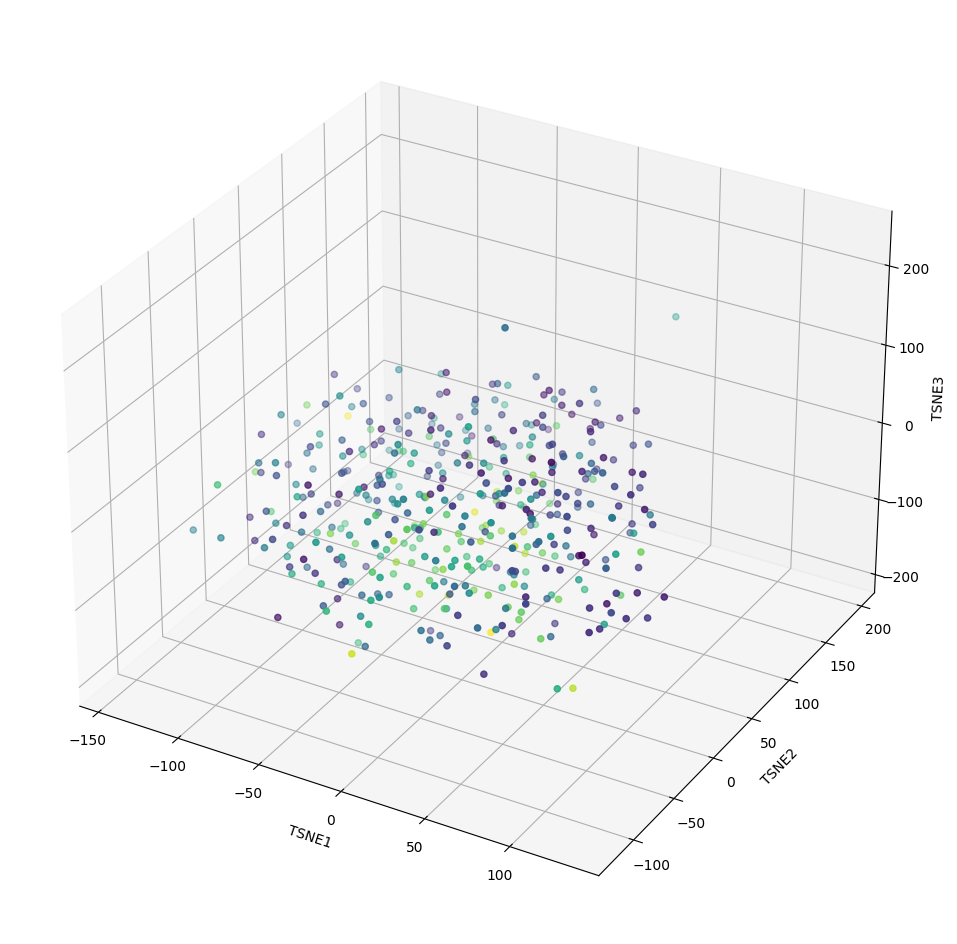

In [54]:
# 4. Apply t-SNE on the same dataset, select first 3 components and plot them.

# tsne = TSNE(n_components=3, random_state=0)
# X_tsne = tsne.fit_transform(Xnorm)

# Plot the transformed data
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=df.target, cmap='viridis')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.show()


In [ ]:

# 5. Report the comparison between the results obtained using t-SNE and PCA.
